In [128]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [129]:
### training dataset ###
train_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151116.txt", sep = "\t", header = None)
train_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df1 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151127.txt", sep = "\t", header = None)
df1.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df2 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151103.txt", sep = "\t", header = None)
df2.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
train_data = train_data.append(df1, ignore_index=True)
train_data = train_data.append(df2, ignore_index=True)
# slice dataset up to attack flag column, drop additional features

#train_data = train_data.loc[:, :'attack_flag']
train_data = train_data.drop(['start time', 'dst IP', 'src IP'], axis=1)

# drop software markers
train_data = train_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
train_data["attack_flag"].value_counts()

train_attack = train_data.loc[(train_data['attack_flag'] == -1)]
train_normal = train_data.loc[(train_data['attack_flag'] == 1)]
train_unknown_attack = train_data.loc[(train_data['attack_flag'] == -2)]
train_attack_red = train_attack.sample(n=100000)
train_normal_red = train_normal.sample(n=100000)

train_red = train_attack_red
train_red = train_red.append(train_normal_red, ignore_index=True)
train_red = train_red.append(train_unknown_attack, ignore_index=True)

/home/matz/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
### testing dataset ###
test_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151219.txt", sep = "\t", header = None)
test_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df3 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151226.txt", sep = "\t", header = None)
df3.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df4 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151203.txt", sep = "\t", header = None)
df4.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
test_data = test_data.append(df3, ignore_index=True)
test_data = test_data.append(df4, ignore_index=True)


test_data.info()
print(test_data["proto"].value_counts(dropna=False))

# slice dataset up to attack flag column, drop additional features
#test_data = test_data.loc[:, :'attack_flag']
test_data = test_data.drop(['start time', 'dst IP', 'src IP'], axis=1)

# drop software markers
test_data = test_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_data["attack_flag"].value_counts()

test_attack = test_data.loc[(test_data['attack_flag'] == -1)]
test_normal = test_data.loc[(test_data['attack_flag'] == 1)]
test_unknown_attack = test_data.loc[(test_data['attack_flag'] == -2)]
test_attack_red = test_attack.sample(n=100000)
test_normal_red = test_normal.sample(n=100000)

test_red = test_attack_red
test_red = test_red.append(test_normal_red, ignore_index=True)
test_red = test_red.append(test_unknown_attack, ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818406 entries, 0 to 818405
Data columns (total 24 columns):
conn len                       818406 non-null float64
service                        818406 non-null object
src bytes                      818406 non-null int64
dst bytes                      818406 non-null int64
conn numb                      818406 non-null int64
Same srv rate                  818406 non-null float64
Serror rate                    818406 non-null float64
Srv serror rate                818406 non-null float64
Dst host count                 818406 non-null int64
Dst host srv count             818406 non-null int64
Dst host same src port rate    818406 non-null float64
Dst host serror rate           818406 non-null float64
Dst host srv serror rate       818406 non-null float64
Conn state                     818406 non-null object
IDS detection                  818406 non-null object
Malware detection              818406 non-null object
Ashula detection       

In [131]:
train_red.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
200037,7.491539,other,2455,1468,2,1.0,0.0,0.00,1,15,0.00,0.00,0.40,SF,-2,3651,445,tcp
200038,4.884188,other,2469,1468,1,1.0,0.0,0.00,3,3,0.00,0.00,0.00,SF,-2,3265,445,tcp
200039,3.016455,other,0,0,0,0.0,0.0,1.00,7,7,0.00,0.29,0.29,S0,-2,1760,445,tcp
200040,12.943828,other,2469,1468,0,0.0,0.0,0.00,8,8,0.12,0.38,0.38,SF,-2,1760,445,tcp
200041,6.709910,other,2451,1468,2,1.0,0.0,0.29,1,3,0.00,0.00,0.00,SF,-2,61236,445,tcp
200042,1.300091,other,2647,1516,2,1.0,0.0,0.56,1,41,0.00,0.00,0.85,SF,-2,2806,445,tcp
200043,7.483030,other,2619,1516,2,1.0,0.0,0.93,1,1,0.00,0.00,0.00,SF,-2,1753,445,tcp
200044,2.143790,other,2647,745,1,1.0,0.0,0.60,3,10,0.00,0.00,0.00,RSTO,-2,34686,139,tcp
200045,6.879202,other,2605,1516,2,1.0,0.0,0.44,1,1,0.00,0.00,0.00,SF,-2,2418,445,tcp
200046,0.944318,other,2491,1468,3,1.0,0.0,0.87,5,9,0.00,0.00,0.00,SF,-2,1139,445,tcp


In [132]:
print(train_red.shape)
print(test_red.shape)

(200047, 18)
(200010, 18)


In [133]:
# removing NaNs
train_red = train_red.dropna()
test_red = test_red.dropna()

In [134]:
print(train_red.shape)
print(test_red.shape)

(200047, 18)
(200010, 18)


In [135]:
train_red.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,200047.000000,200047.000000,2.000470e+05,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000
mean,0.760293,115.808345,3.115845e+03,4.958920,0.564199,0.035010,0.343420,45.072543,53.968577,0.046494,0.079440,0.119474,-0.000470,37891.896704,3364.031883
std,5.179030,370.164853,1.213181e+06,8.369704,0.491462,0.177356,0.434847,42.316127,43.883482,0.207592,0.265013,0.317481,1.000355,18476.924894,12015.938358
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000
25%,0.000001,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,32172.000000,25.000000
50%,0.000366,44.000000,6.600000e+01,1.000000,1.000000,0.000000,0.000000,43.000000,69.000000,0.000000,0.000000,0.000000,-1.000000,42367.000000,53.000000
75%,0.653875,61.000000,1.110000e+02,5.000000,1.000000,0.000000,0.890000,96.000000,98.000000,0.000000,0.000000,0.000000,1.000000,52105.000000,80.000000
max,906.197710,61912.000000,5.425908e+08,100.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65530.000000


In [136]:
train_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200047 entries, 0 to 200046
Data columns (total 18 columns):
conn len                       200047 non-null float64
service                        200047 non-null object
src bytes                      200047 non-null int64
dst bytes                      200047 non-null int64
conn numb                      200047 non-null int64
Same srv rate                  200047 non-null float64
Serror rate                    200047 non-null float64
Srv serror rate                200047 non-null float64
Dst host count                 200047 non-null int64
Dst host srv count             200047 non-null int64
Dst host same src port rate    200047 non-null float64
Dst host serror rate           200047 non-null float64
Dst host srv serror rate       200047 non-null float64
Conn state                     200047 non-null object
attack_flag                    200047 non-null int64
src port                       200047 non-null int64
dst port                 

In [137]:
train_red["Conn state"].value_counts(dropna=False)

SF        91345
S0        69545
RSTO      23981
OTH        8282
REJ        4122
RSTR       1660
RSTRH       438
RSTOS0      319
SHR         293
S1           48
SH            8
S3            4
S2            2
Name: Conn state, dtype: int64

In [138]:
train_red["service"].value_counts(dropna=False)

dns      87112
other    81638
ssh      27253
smtp      1850
sip       1627
rdp        281
snmp       233
http        46
dhcp         7
Name: service, dtype: int64

In [139]:
### training dataset hot one encoding ###

# hot one encoding for service
train_red = pd.concat([train_red, pd.get_dummies(train_red["service"], prefix="is")], axis=1)
train_red.tail(10)

# hot one encoding for proto - commented due to reduced column number
train_red = pd.concat([train_red, pd.get_dummies(train_red["proto"], prefix="is")], axis=1)
train_red.tail(10)

# hot one encoding for conn state
train_red = pd.concat([train_red, pd.get_dummies(train_red["Conn state"], prefix="state")], axis=1)
train_red.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_S2,state_S3,state_SF,state_SH,state_SHR
200037,7.491539,other,2455,1468,2,1.0,0.0,0.00,1,15,...,0,0,0,0,0,0,0,1,0,0
200038,4.884188,other,2469,1468,1,1.0,0.0,0.00,3,3,...,0,0,0,0,0,0,0,1,0,0
200039,3.016455,other,0,0,0,0.0,0.0,1.00,7,7,...,0,0,0,1,0,0,0,0,0,0
200040,12.943828,other,2469,1468,0,0.0,0.0,0.00,8,8,...,0,0,0,0,0,0,0,1,0,0
200041,6.709910,other,2451,1468,2,1.0,0.0,0.29,1,3,...,0,0,0,0,0,0,0,1,0,0
200042,1.300091,other,2647,1516,2,1.0,0.0,0.56,1,41,...,0,0,0,0,0,0,0,1,0,0
200043,7.483030,other,2619,1516,2,1.0,0.0,0.93,1,1,...,0,0,0,0,0,0,0,1,0,0
200044,2.143790,other,2647,745,1,1.0,0.0,0.60,3,10,...,0,0,0,0,0,0,0,0,0,0
200045,6.879202,other,2605,1516,2,1.0,0.0,0.44,1,1,...,0,0,0,0,0,0,0,1,0,0
200046,0.944318,other,2491,1468,3,1.0,0.0,0.87,5,9,...,0,0,0,0,0,0,0,1,0,0


In [140]:
### testing dataset hot one encoding ###

# hot one encoding for service
test_red = pd.concat([test_red, pd.get_dummies(test_red["service"], prefix="is")], axis=1)
test_red.tail(10)

# hot one encoding for proto - commented due to reduced column number
test_red = pd.concat([test_red, pd.get_dummies(test_red["proto"], prefix="is")], axis=1)
test_red.tail(10)

# hot one encoding for conn state
test_red = pd.concat([test_red, pd.get_dummies(test_red["Conn state"], prefix="state")], axis=1)
test_red.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_S2,state_S3,state_SF,state_SH,state_SHR
200000,6.733803,other,2457,1468,2,1.0,0.00,0.50,1,1,...,0,0,0,0,0,0,0,1,0,0
200001,4.740597,other,2465,1468,3,1.0,0.00,0.40,1,64,...,0,0,0,0,0,0,0,1,0,0
200002,46683.468919,other,2478,1395,2,1.0,0.00,0.67,1,3,...,0,0,0,0,1,0,0,0,0,0
200003,3.350512,other,2617,1516,2,1.0,0.00,0.33,1,3,...,0,0,0,0,0,0,0,1,0,0
200004,6.163439,other,2453,1468,2,1.0,0.00,0.60,1,2,...,0,0,0,0,0,0,0,1,0,0
200005,7.045184,other,2615,1546,1,1.0,0.00,0.75,3,61,...,0,0,0,0,0,0,0,1,0,0
200006,6.972637,other,2615,1546,2,1.0,0.00,0.81,3,58,...,0,0,0,0,0,0,0,1,0,0
200007,2.968651,other,2491,1468,1,1.0,0.00,0.67,1,3,...,0,0,0,0,0,0,0,1,0,0
200008,19.301852,other,8947,3428,4,1.0,0.75,0.80,1,49,...,0,0,0,0,0,0,0,1,0,0
200009,7.147713,other,2617,1546,2,1.0,0.00,0.50,1,3,...,0,0,0,0,0,0,0,1,0,0


In [141]:
train_red.shape

(200047, 43)

In [142]:
train_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200047 entries, 0 to 200046
Data columns (total 43 columns):
conn len                       200047 non-null float64
service                        200047 non-null object
src bytes                      200047 non-null int64
dst bytes                      200047 non-null int64
conn numb                      200047 non-null int64
Same srv rate                  200047 non-null float64
Serror rate                    200047 non-null float64
Srv serror rate                200047 non-null float64
Dst host count                 200047 non-null int64
Dst host srv count             200047 non-null int64
Dst host same src port rate    200047 non-null float64
Dst host serror rate           200047 non-null float64
Dst host srv serror rate       200047 non-null float64
Conn state                     200047 non-null object
attack_flag                    200047 non-null int64
src port                       200047 non-null int64
dst port                 

In [143]:
# check differences between datasets after hot one encoding

train_red.columns.difference(test_red.columns)
# print(train_data.columns.difference(test_data.columns)[0])
for c in train_red.columns.difference(test_red.columns):
    test_red[c] = 0
for c in test_red.columns.difference(train_red.columns):
    train_red[c] = 0


## Data visualization

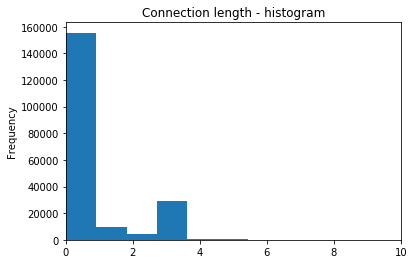

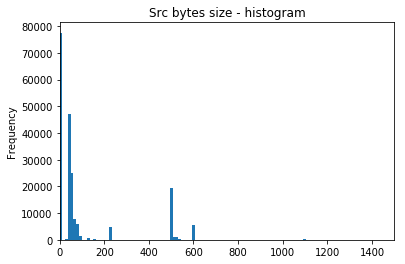

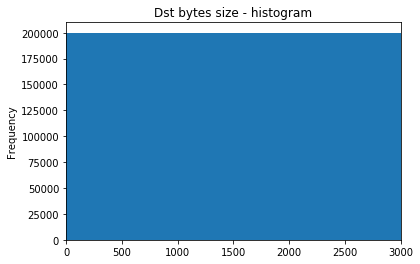

In [144]:
# hisotgrams
# data[data.column > 1000]
#print(max(train_red['conn len']))
train_red['conn len'].plot.hist(bins=1000, xlim=[0,10], title="Connection length - histogram")
plt.show()

#print(max(train_red['src bytes']))
train_red['src bytes'].plot.hist(bins=5000, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(train_red['dst bytes']))
train_red['dst bytes'].plot.hist(bins=5000, xlim=[0,3000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

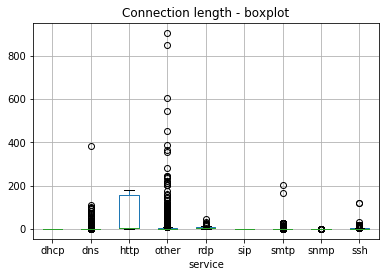

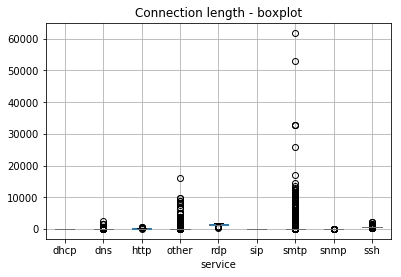

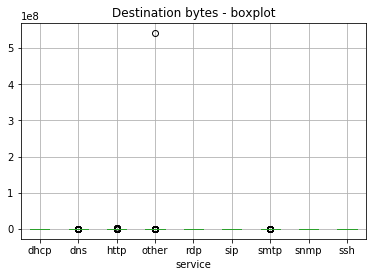

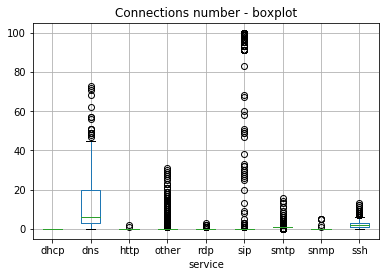

In [145]:
# boxplots
train_red.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

train_red.boxplot(column='src bytes', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

train_red.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

train_red.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

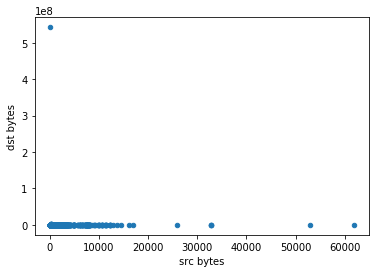

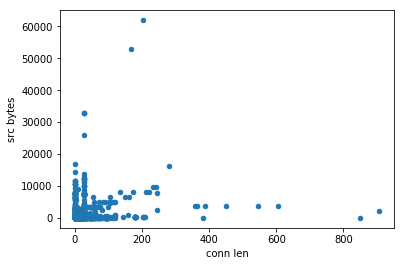

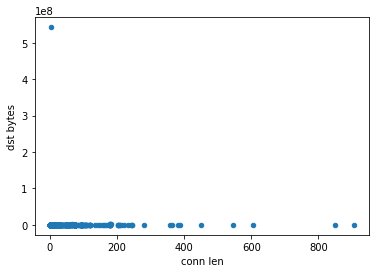

In [146]:
# scatter plots
train_red.plot.scatter(x='src bytes', y= 'dst bytes')
train_red.plot.scatter(x='conn len', y= 'src bytes')
train_red.plot.scatter(x='conn len', y= 'dst bytes')

In [147]:
### training dataset - drop categorical columns ####

train_red = train_red.drop(["service", "Conn state", "proto"], axis=1)

In [148]:
### testing dataset - drop categorical columns ####

test_red = test_red.drop(["service", "Conn state", "proto"], axis=1)

## First experiments with algorithms

In [149]:
train_red.shape

(200047, 41)

In [150]:
### training dataset - make the dataset binary one ###
train_red.loc[:, "attack_flag"] = train_red.loc[:,"attack_flag"].replace(-2, -1)
train_red.loc[:, "attack_flag"] = train_red.loc[:, "attack_flag"] * -1

In [151]:
### testing dataset - make the dataset binary one ###
test_red.loc[:, "attack_flag"] = test_red.loc[:,"attack_flag"].replace(-2, -1)
test_red.loc[:, "attack_flag"] = test_red.loc[:, "attack_flag"] * -1

In [152]:
# plotting method definition

def plot_stats(stat, name):
    fig, ax = plt.subplots(figsize=(8, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [153]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt

#sampled_train_data = train_red.sample(n=30000, random_state=1)
#sampled_test_data = test_red.sample(n=30000, random_state=1)

sampled_train_data = train_red
sampled_test_data = test_red

X = sampled_train_data.loc[:, sampled_train_data.columns != 'attack_flag']
y = sampled_train_data.loc[:, sampled_train_data.columns == 'attack_flag'].values.ravel()
X_train, a, y_train, b = train_test_split(X, y, test_size=0.3, random_state=4)

X = sampled_test_data.loc[:, sampled_test_data.columns != 'attack_flag']
y = sampled_test_data.loc[:, sampled_test_data.columns == 'attack_flag'].values.ravel()
a, X_test, b, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

seed = 12

print(Counter(y_test))
print(Counter(y_train))

# wykres po num_trees od 2-40 co 2 dla przykładu

num_trees = 35
kfold = KFold(n_splits=10, random_state=seed)

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=num_trees, random_state=seed),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=36, max_depth=22, random_state=0)}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))



Counter({1: 30039, -1: 29964})
Counter({1: 70062, -1: 69970})
Algorithm: AdaBoost     Accuracy: 0.89541, F1-score: 0.89610, Precision: 0.89129, Recall: 0.90096, FPR: 0.11017
TN: 26663; FP: 3301; FN: 2975; TP: 27064

Algorithm: DecisionTree Accuracy: 0.55469, F1-score: 0.41647, Precision: 0.60536, Recall: 0.31742, FPR: 0.20745
TN: 23748; FP: 6216; FN: 20504; TP: 9535

Algorithm: NaiveBayes   Accuracy: 0.54456, F1-score: 0.16946, Precision: 0.97312, Recall: 0.09281, FPR: 0.00257
TN: 29887; FP:  77; FN: 27251; TP: 2788

Algorithm: RandomTree   Accuracy: 0.83892, F1-score: 0.84638, Precision: 0.80988, Recall: 0.88631, FPR: 0.20858
TN: 23714; FP: 6250; FN: 3415; TP: 26624

Algorithm: RandomForest Accuracy: 0.83346, F1-score: 0.85221, Precision: 0.76674, Recall: 0.95912, FPR: 0.29252
TN: 21199; FP: 8765; FN: 1228; TP: 28811



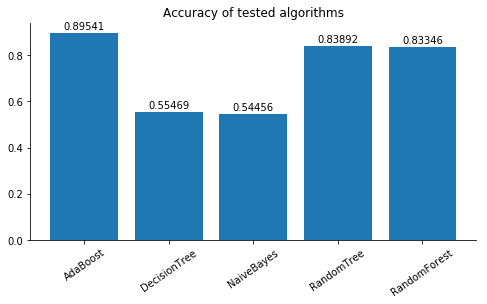

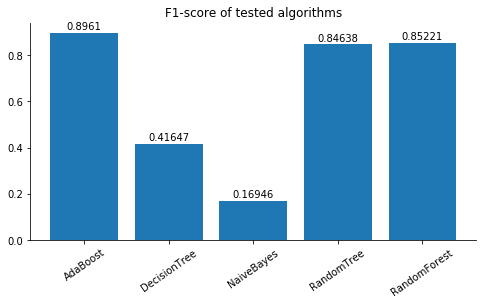

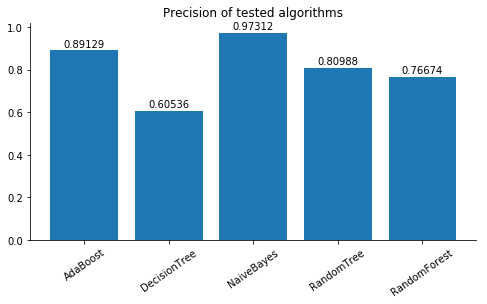

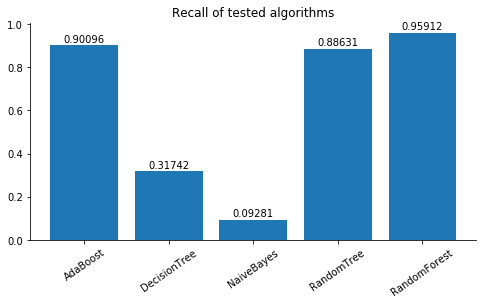

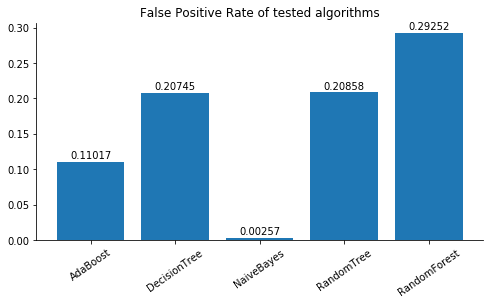

In [154]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

In [155]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


# wykres po num_trees od 2-40 co 2 dla przykładu

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

num_trees = 35
kfold = KFold(n_splits=10, random_state=seed)

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=num_trees, random_state=seed),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=36, max_depth=22, random_state=0)}


for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: AdaBoost_scaled Accuracy: 0.89541, F1-score: 0.89610, Precision: 0.89129, Recall: 0.90096, FPR: 0.11017
TN: 26663; FP: 3301; FN: 2975; TP: 27064



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: 

Algorithm: DecisionTree_scaled Accuracy: 0.55439, F1-score: 0.41628, Precision: 0.60468, Recall: 0.31739, FPR: 0.20802
TN: 23731; FP: 6233; FN: 20505; TP: 9534



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Algorithm: NaiveBayes_scaled Accuracy: 0.48044, F1-score: 0.64901, Precision: 0.49034, Recall: 0.95949, FPR: 0.99980
TN:   6; FP: 29958; FN: 1217; TP: 28822



/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Algorithm: RandomTree_scaled Accuracy: 0.83892, F1-score: 0.84638, Precision: 0.80988, Recall: 0.88631, FPR: 0.20858
TN: 23714; FP: 6250; FN: 3415; TP: 26624



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest_scaled Accuracy: 0.83511, F1-score: 0.85384, Precision: 0.76749, Recall: 0.96208, FPR: 0.29218
TN: 21209; FP: 8755; FN: 1139; TP: 28900



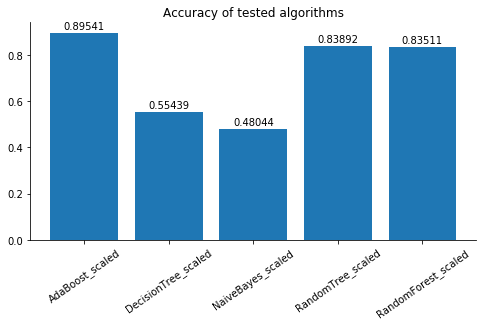

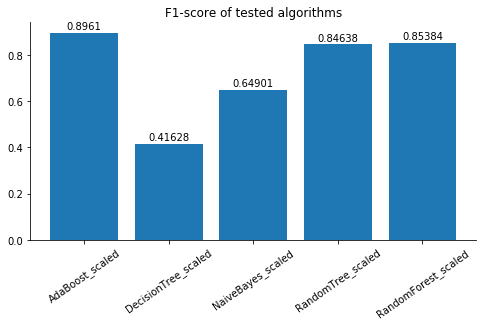

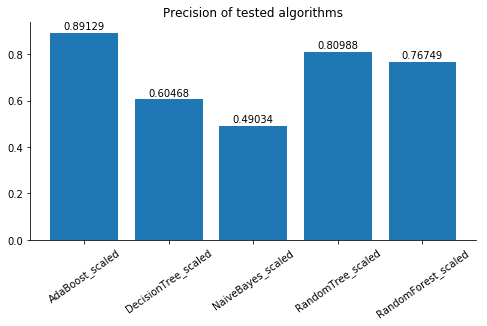

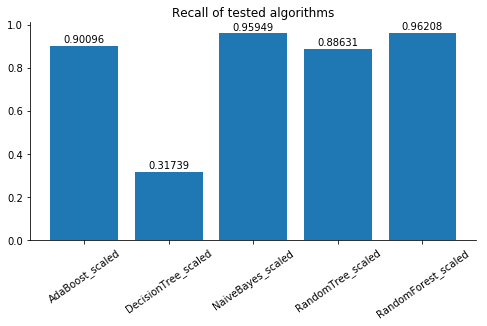

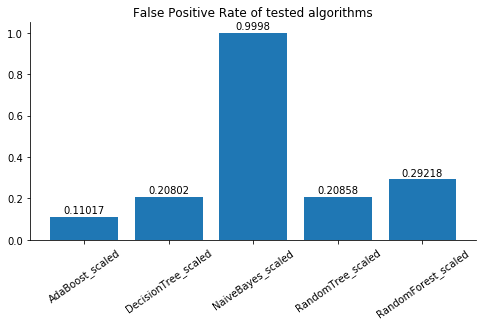

In [156]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")